In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Boston Marathon 2014.csv")
df.head(200)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [3]:
print(df.shape)
print(df.info())

(31984, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB
None


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [6]:
#create dummies for gender
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,F,M
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,0,1
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,1,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,0,1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,1,0
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,0,1


In [7]:
#df_new['5k'] = df_new['5k'].astype(float)

columns = ['5k','10k','25k','35k','30k','half','20k','40k']
for col in  df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#df['5k','10k','25k','35k','30k','half','20k','40k'] = pd.to_numeric(df['5k','10k','25k','35k','30k','half','20k','40k'], errors='coerce')
df.fillna(0, inplace = True)

In [8]:
df_new = df.drop(['name','bib','ctz','state','country','city','gender'],axis=1)

In [9]:
df_new.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,F,M
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,0,1
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,1,0
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,0,1
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,1,0
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,0,1


In [10]:
df_new.isnull().sum(axis = 0)

10k          0
division     0
25k          0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
40k          0
F            0
M            0
dtype: int64

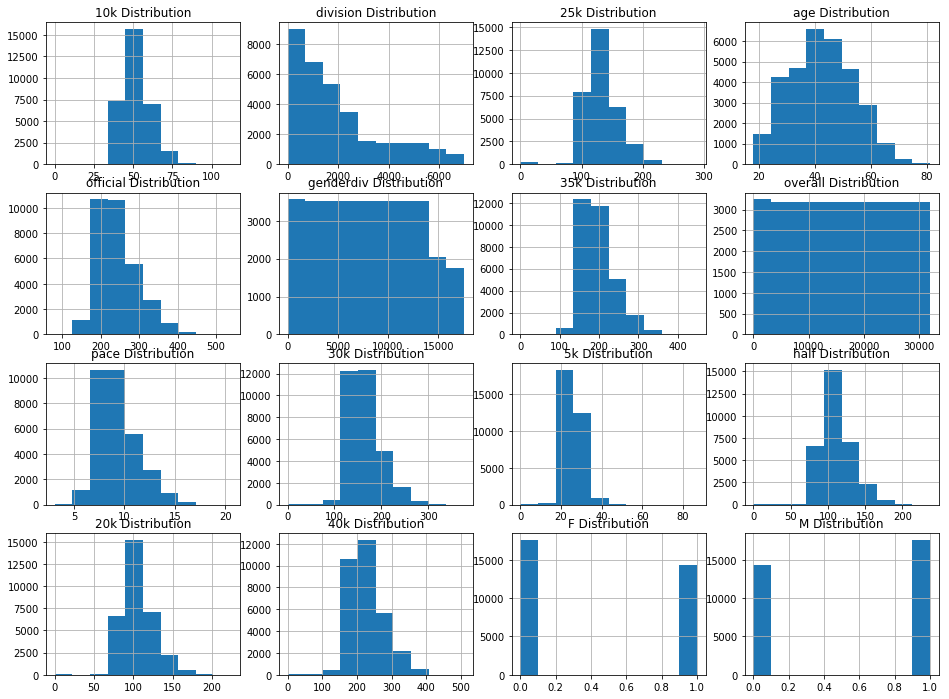

In [11]:
def plot_histograms(df_hist, vars):
    fig=plt.figure(figsize=(16,12))
    for i, var_name in enumerate(vars):
        ax=fig.add_subplot(4,4,i+1)
        df_hist[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    plt.show()

plot_histograms(df_new, df_new.columns)

In [12]:
#standardize the data to normal distribution
from sklearn import preprocessing
df_new_standardized = preprocessing.scale(df_new)
df_new_standardized = pd.DataFrame(df_new_standardized)
df_new_standardized.columns = df_new.columns

In [13]:
print(df_new.head())
print(df_new_standardized.head())

     10k  division    25k  age  official  genderdiv     35k  overall  pace  \
0  17.37         8  47.67   47     85.25          8   71.40        8  3.27   
1  32.58         1  82.43   33    138.95          1  116.37       21  5.30   
2  16.62         1  45.80   41     80.60          1   67.42        1  3.08   
3  32.57         3  82.43   24    140.58          3  116.37       27  5.37   
4  17.12         2  46.37   40     81.23          2   67.83        2  3.10   

     30k     5k   half    20k     40k  F  M  
0  59.18   8.02  39.72  37.65   80.43  0  1  
1  99.33  16.22  69.47  65.83  132.10  1  0  
2  56.45   7.75  38.03  36.10   76.10  0  1  
3  99.33  16.20  69.47  65.83  132.95  1  0  
4  57.03   8.02  38.60  36.58   76.72  0  1  
        10k  division       25k       age  official  genderdiv       35k  \
0 -3.737924 -1.122062 -3.063610  0.405867 -3.016223  -1.691872 -2.950928   
1 -2.082709 -1.126143 -1.811359 -0.831284 -1.989447  -1.693345 -1.891407   
2 -3.819542 -1.126143 -3.13

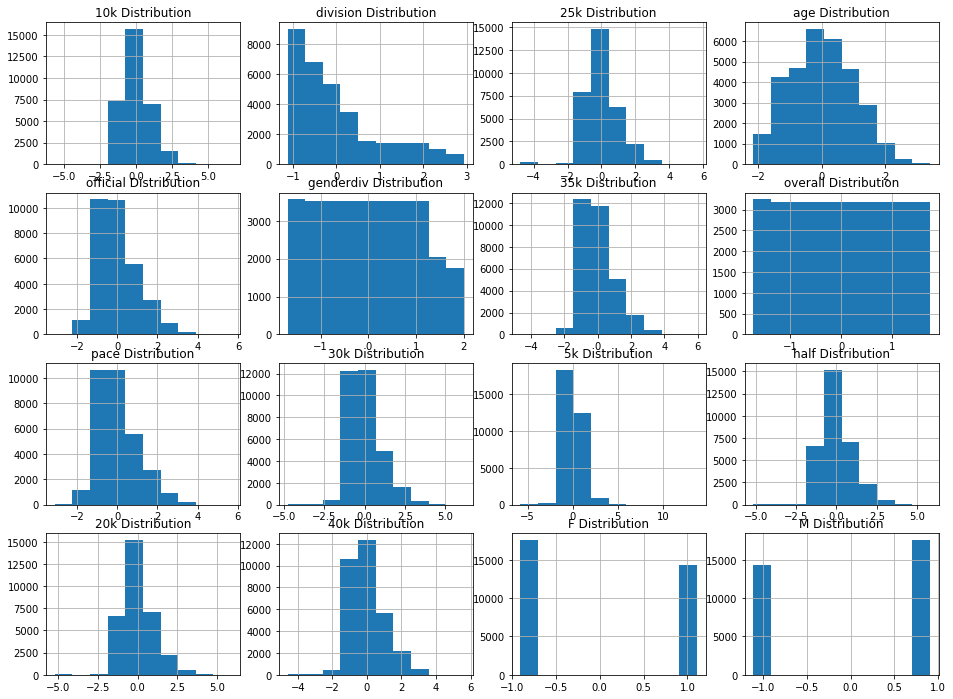

In [14]:
plot_histograms(df_new_standardized, df_new_standardized.columns)

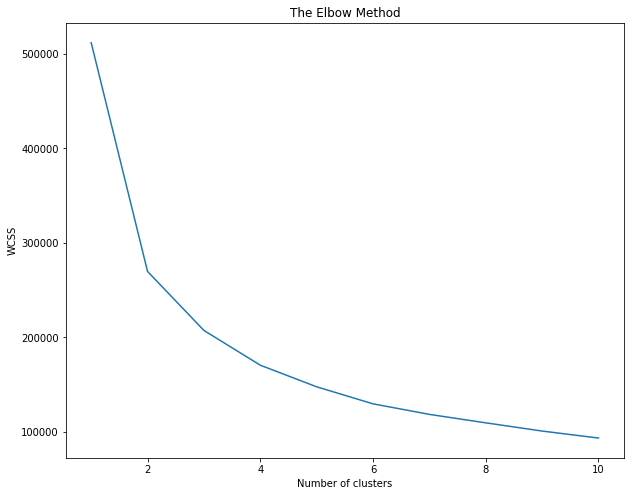

In [15]:
#K Means
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
km = KMeans(n_clusters=4).fit(df_new_standardized)
y_pred = km.predict(df_new_standardized)
print(km.labels_)
df['kmeanClusters'] = y_pred

[1 1 1 ... 2 2 3]


In [17]:
res=km.__dict__
print(res['cluster_centers_'])

[[-0.06853496 -0.17282236 -0.0660064  -0.18344548 -0.18210438 -0.52938103
  -0.15775515 -0.04426443 -0.1820278  -0.13472141 -0.05634108 -0.1006195
  -0.09417159 -0.16765863  1.10734495 -1.10734495]
 [-1.03102627 -0.46857773 -0.93067145 -0.23354253 -1.00053186 -0.86497841
  -0.99609855 -1.18200875 -1.00137802 -1.00000914 -1.02814947 -1.00422144
  -1.01456695 -0.98849532 -0.75739229  0.75739229]
 [ 1.42099447  0.96194078  1.2877101  -0.06318223  1.51640426  1.22366332
   1.52460738  1.3465776   1.51715506  1.51900913  1.37909516  1.46847372
   1.47198447  1.48906837  0.28519427 -0.28519427]
 [ 0.07830852 -0.07494119  0.07175961  0.66267882  0.10887797  0.74075028
   0.05787064  0.32688476  0.1091674   0.03447783  0.09884365  0.04080879
   0.04187673  0.0984878  -0.90275271  0.90275271]]


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_new_standardized, y_pred)
print(dict(zip(df_new_standardized.columns, clf.feature_importances_)))
#clf.feature_importances_

{'10k': 0.008493658071736222, 'division': 0.02268754929534747, '25k': 0.0034397547701542366, 'age': 0.0057775608845516135, 'official': 0.0033456891982309753, 'genderdiv': 0.002614713769429328, '35k': 0.02117365285985158, 'overall': 0.007864001505864231, 'pace': 0.000364958770427946, '30k': 0.5560511428985376, '5k': 0.005567581072425287, 'half': 0.007749514273405003, '20k': 0.002184668776203579, '40k': 0.004940252300016279, 'F': 0.0004533642753069761, 'M': 0.34729193727851165}


In [19]:
for i in range(0,4):
    print(i)
    print(df.query('kmeanClusters==@i').describe())

0
               10k    name     division          25k  gender          age  \
count  9775.000000  9775.0  9775.000000  9775.000000  9775.0  9775.000000   
mean     51.088521     0.0  1636.137801   130.877516     0.0    40.331151   
std       4.058535     0.0  1361.342376    10.432804     0.0     9.951864   
min       0.000000     0.0     1.000000     0.000000     0.0    18.000000   
25%      48.200000     0.0   564.000000   122.900000     0.0    32.000000   
50%      50.680000     0.0  1209.000000   129.880000     0.0    41.000000   
75%      53.900000     0.0  2467.500000   138.600000     0.0    48.000000   
max      86.230000     0.0  6437.000000   193.300000     0.0    75.000000   

          official           bib     genderdiv     ctz          35k  \
count  9775.000000   9775.000000   9775.000000  9775.0  9775.000000   
mean    233.473326  19231.988747   5534.403683     0.0   189.952625   
std      21.916013   6024.172382   2876.370291     0.0    17.324207   
min     191.120000  

               10k    name     division          25k  gender          age  \
count  6523.000000  6523.0  6523.000000  6523.000000  6523.0  6523.000000   
mean     52.436842     0.0  1803.993561   134.699120     0.0    49.906025   
std       4.396494     0.0  1321.969864    11.402626     0.0    11.034079   
min       0.000000     0.0     1.000000     0.000000     0.0    18.000000   
25%      49.100000     0.0   778.500000   125.770000     0.0    43.000000   
50%      52.120000     0.0  1618.000000   133.880000     0.0    51.000000   
75%      55.575000     0.0  2202.000000   142.750000     0.0    58.000000   
max      91.730000     0.0  5910.000000   176.770000     0.0    81.000000   

          official           bib     genderdiv     ctz          35k  \
count  6523.000000   6523.000000   6523.000000  6523.0  6523.000000   
mean    248.687119  21423.935459  11572.076805     0.0   199.101403   
std      23.792483   8722.441463   2051.724583     0.0    18.739550   
min     206.020000    

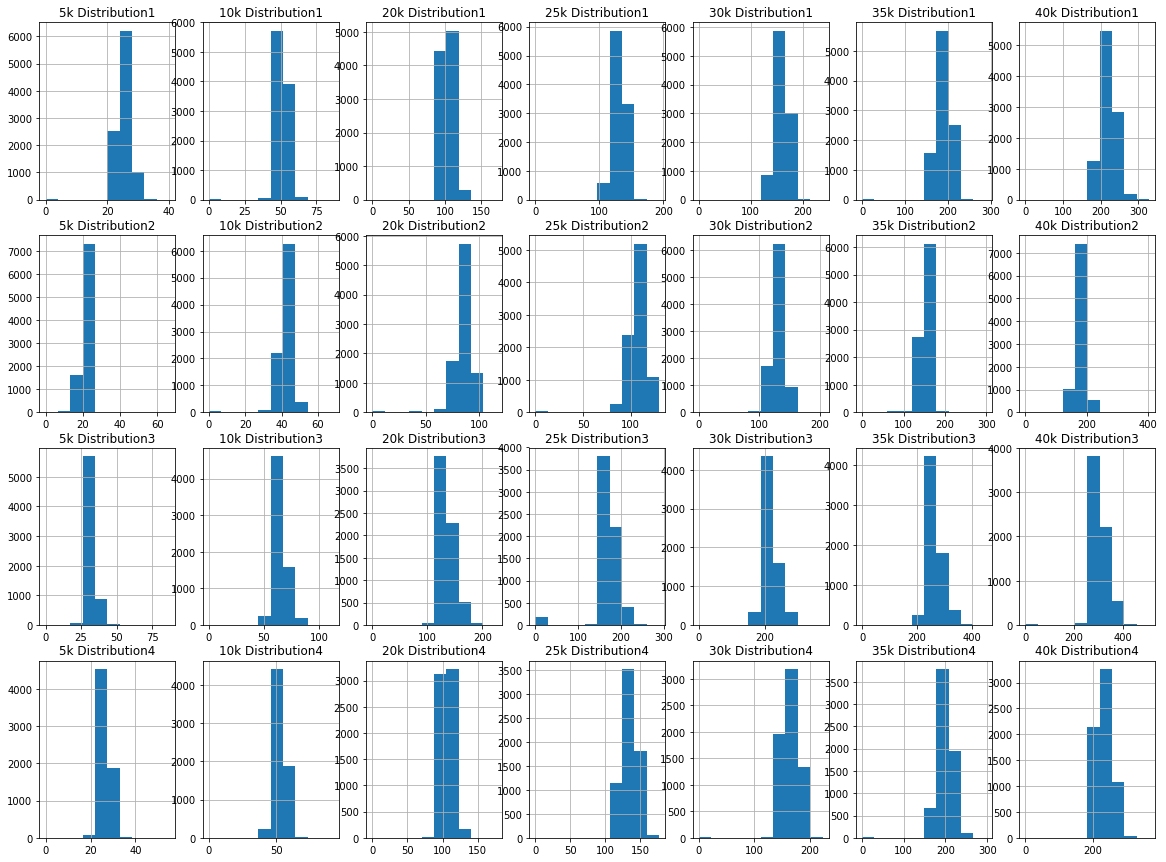

In [48]:
cols = ['5k','10k','20k','25k','30k','35k','40k']
fig=plt.figure(figsize=(20,15))
for i in range(0,4):
    df_viz = df.query('kmeanClusters==@i')
    for j,col in enumerate(cols):
        ax=fig.add_subplot(4,7,(i*7)+j+1)
        df_viz[col].hist(bins=10,ax=ax)
        ax.set_title(col+" Distribution"+str(i+1))
        #df_viz["10k"].hist(bins=10,ax=ax)
        #ax.set_title("10k Distribution for "+str(i+1))
plt.show()

Text(0, 0.5, 'Density')

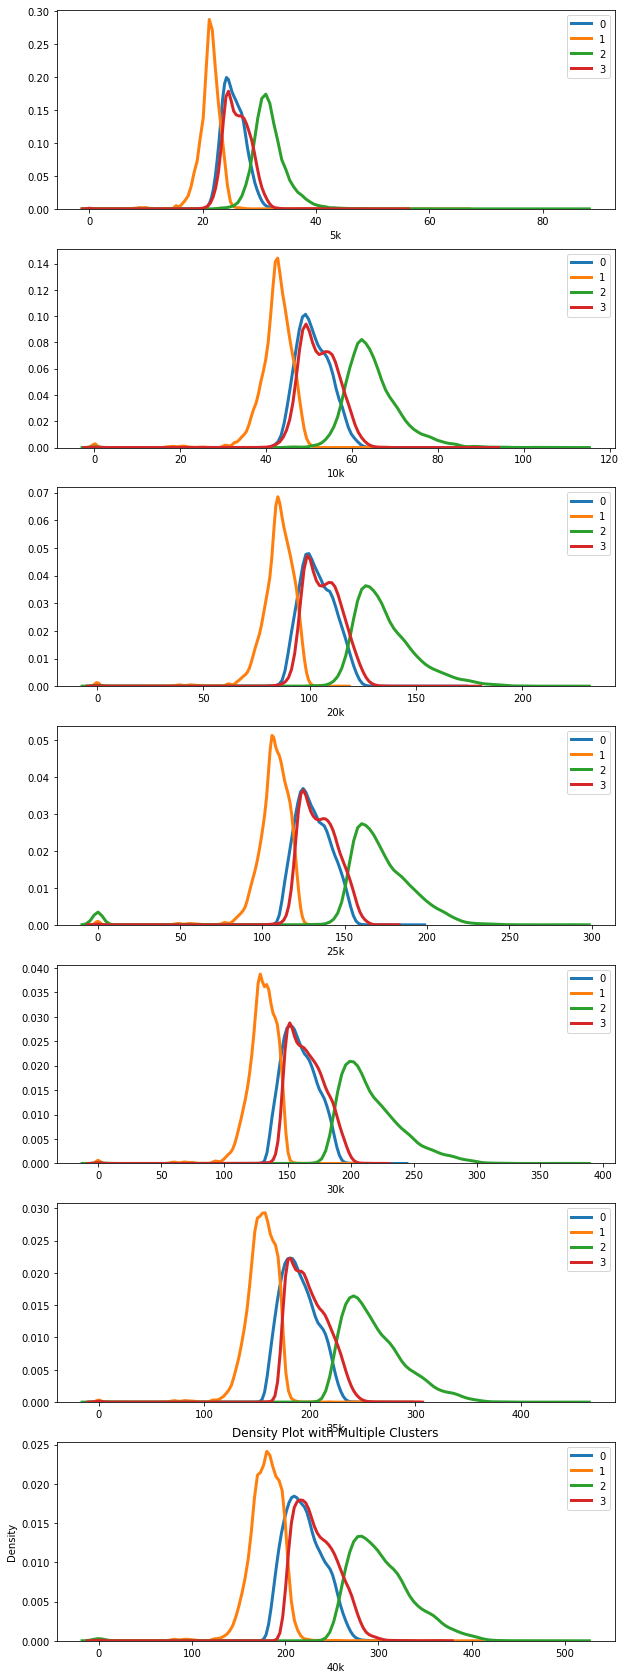

In [72]:
clusters = [0,1,2,3]

# Iterate through the five airlines
f, axes = plt.subplots(7,1, figsize=(10, 30))
for cluster in clusters:
    # Subset to the airline
    subset = df[df['kmeanClusters'] == cluster]
    
    # Draw the density plot
    for j,col in enumerate(cols):
        sns.distplot(subset[col], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = cluster, ax=axes[j])
    #sns.distplot(subset['5k'], hist = False, kde = True,
    #             kde_kws = {'linewidth': 3},
    #             label = cluster)
    
# Plot formatting
#plt.legend(prop={'size': 16}, title = 'Cluster')
plt.title('Density Plot with Multiple Clusters')
#plt.xlabel('5k')
plt.ylabel('Density')

In [ ]:
df.head()

In [ ]:
df.groupby('kmeanClusters').size()

In [ ]:
#MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(df_new_standardized, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_pred = ms.fit_predict(df_new_standardized)
df['MeanShiftClusters'] = y_pred

# Extract cluster assignments for each data point.
labels = ms.labels_

print(labels)

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

In [ ]:
df.groupby('MeanShiftClusters').size()

In [ ]:
#spectral clustering
#from sklearn.cluster import SpectralClustering
#plt.figure(figsize=(10, 8))
#wcss = []
#for i in range(5, 10):
#    sc = SpectralClustering(n_clusters=i)
#    sc.fit(df_new_standardized)
#    wcss.append(sc.inertia_)
#plt.plot(range(5,10), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

#Predicted clusters.
#predict=sc.fit_predict(df_new_standardized)

In [ ]:
#spectral clustering
#from sklearn.cluster import SpectralClustering
#df_sample = df_new_standardized.sample(n=1000)
#sc = SpectralClustering(n_clusters=2)
#sc.fit(df_sample)
#y_pred = sc.fit_predict(df_new_standardized)
#df['SpectralClusters'] = y_pred
#df.groupby('SpectralClusters').size()